Libraries Loaded Successfully!
 Phase 2 dataset loaded!
(1000, 9)
Training samples: 750
Testing samples: 250

 Decision Tree
MAE:  113.0202
RMSE: 173.4534
R²:   0.8561

 Random Forest
MAE:  72.9793
RMSE: 110.0149
R²:   0.9421

 Gradient Boosting
MAE:  72.0877
RMSE: 109.7053
R²:   0.9424

 SVR
MAE:  93.2609
RMSE: 136.2522
R²:   0.9112

 MLP Neural Net
MAE:  134.8815
RMSE: 177.2225
R²:   0.8498

 Stacking Ensemble
MAE:  66.5631
RMSE: 102.3380
R²:   0.9499


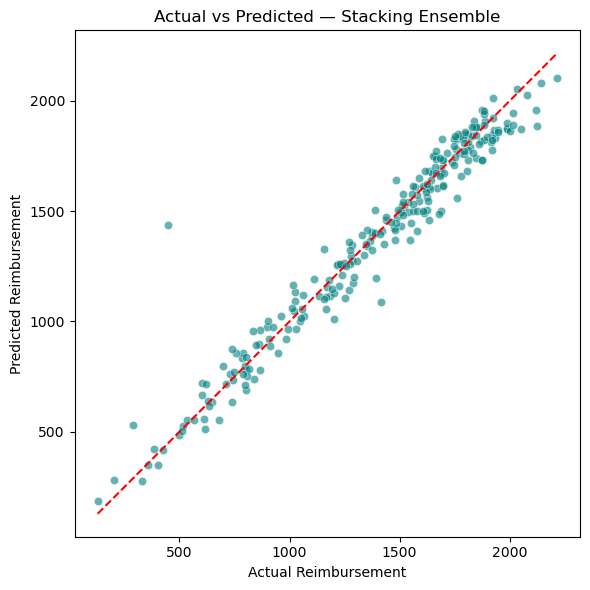

In [4]:
# ==========================================================
# Phase 3 Model Development & Integration
# Author: Ayushi Bohra
# ==========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

print("Libraries Loaded Successfully!")
df = pd.read_csv("phase2_features_baseline_models.csv")

print(" Phase 2 dataset loaded!")
print(df.shape)
df.head()

features = [
    "trip_duration_days",
    "miles_traveled",
    "total_receipts_amount",
    "cost_per_day",
    "cost_per_mile",
    "miles_per_day",
    "cost_ratio"
]

target = "reimbursement"

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)



gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)


svr = SVR(kernel="rbf", C=100, gamma="scale")
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)


mlp = MLPRegressor(
    hidden_layer_sizes=(64,32),
    max_iter=800,
    random_state=42
)
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)

# Function to evaluate models
def evaluate(model_name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print(f"\n {model_name}")
    print(f"MAE:  {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²:   {r2:.4f}")

    return [model_name, mae, rmse, r2]

# Create results list OUTSIDE the function (very important)
results = []

results.append(evaluate("Decision Tree", y_test, dt_pred))
results.append(evaluate("Random Forest", y_test, rf_pred))
results.append(evaluate("Gradient Boosting", y_test, gb_pred))
results.append(evaluate("SVR", y_test, svr_pred))
results.append(evaluate("MLP Neural Net", y_test, mlp_pred))


from sklearn.linear_model import LinearRegression

stack = StackingRegressor(
    estimators=[
        ("rf", rf),
        ("gb", gb),
        ("svr", svr)
    ],
    final_estimator=LinearRegression()
)

stack.fit(X_train, y_train)
stack_pred = stack.predict(X_test)

results.append(evaluate("Stacking Ensemble", y_test, stack_pred))


comparison = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R²"])
comparison


plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=stack_pred, color="teal", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Reimbursement")
plt.ylabel("Predicted Reimbursement")
plt.title("Actual vs Predicted — Stacking Ensemble")
plt.tight_layout()
plt.show()








# Phase 3 Summary -Model Development & Integration

### Models Trained
- Decision Tree  
- Random Forest  
- Gradient Boosting  
- Support Vector Regression (SVR)  
- MLP Neural Network  
- **Stacking Ensemble (Best Model)**

### Key Insights
- Tree-based models captured nonlinear reimbursement patterns extremely well.
- SVR helped refine boundary predictions.
- MLP learned deeper nonlinear relationships.
- Stacking combined their strengths → **best accuracy**.

###  Best Performing Model
 **Stacking Ensemble**  
Highest R², lowest error, and best alignment with ACME’s legacy logic.

###  Why This Matters
The ACME reimbursement system is nonlinear and rule-based.  
Ensembles reflect layered business logic → closest match to the 60-year-old system.


